The following experiment can be a good method to verify if the code for the Bernoulli Restricted Boltzmann Machine (RBM) works correctly. I saw this idea in a talk by Prof. Hinton (https://www.youtube.com/watch?v=AyzOUbkUf3M, see from 12:55 onwards). 

In this case, we train the RBM on only the mnist digits with label as 2. We then test the RBM by supplying an image with a different label (something that it was not trained on, in this case, 3) and ask it to reconstruct back using n Gibbs sampling steps. If the RBM trained well to recognize 2s, it should convert the 3 to a 2. Note that since the RBM memorizes 2s, any other image is a confabulation and so the reconstruction process must try to recover the true memory (i.e., the images of digit 2) when supplied with the confabulation (i.e., the digit 3). 

In [1]:
import torch
from torchvision import datasets
from BernoulliRBM import BernoulliRBM
import matplotlib.pyplot as plt

In [2]:
# Function to display digit 
def show_digit(x):
    plt.imshow(x.reshape((28, 28)), cmap=plt.cm.gray)
    plt.show()

In [3]:
# Load mnist data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,))
train_data = train_loader.dataset.train_data
train_labels = train_loader.dataset.train_labels

In [4]:
# Filter images for the digit 2. 
len_mnist_images = len(train_data)
len_image = 784
mnist_images_2 = []
for i in range(len_mnist_images): 
    temp = train_labels[i]
    if temp == 2:
        mnist_images_2.append(train_data[i].type(torch.FloatTensor).resize_(len_image,1)/255)

In [5]:
# Convert to one large matrix for rbm training. 
len_mnist_images_2 = len(mnist_images_2)
mnist_image_matrix = torch.FloatTensor(len_image, len_mnist_images_2)
for i in range(len_mnist_images_2): 
    mnist_image_matrix[:, i] = mnist_images_2[i].bernoulli()

In [6]:
# Take an example image of a different class, in this case, of digit 3.
example_class = 3 
mnist_test_image = torch.FloatTensor(len_image, 1)
for i in range(len_mnist_images): 
    temp = train_labels[i]
    if temp == example_class:
        mnist_test_image = (train_data[i].type(torch.FloatTensor).resize_(len_image,1)/255).bernoulli()
        break

In [7]:
# Hyperparameters
n_vis = len(mnist_image_matrix[:, 0])
n_hid = 500
init_wt_var = 0.01
l_rate = 0.01
n_itr = 50
bsz = 10
verb = True
xv_init = True
lr_decay = True
inc_cd_k = False
cdk = 5

print("Setting n_v = ", n_vis,
      ", n_h = ", n_hid,
      ", init_wt_var = ", init_wt_var,
      ", lr = ", l_rate,
      ", n_itr = ", n_itr,
      ", bsz = ", bsz,
      ", verbose = ", verb,
      ", xv_init = ", xv_init,
      ", lr_decay = ", lr_decay,
      ", inc_cd_k = ", inc_cd_k,
      ", cdk = ", cdk)

Setting n_v =  784 , n_h =  500 , init_wt_var =  0.01 , lr =  0.01 , n_itr =  50 , bsz =  10 , verbose =  True , xv_init =  True , lr_decay =  True , inc_cd_k =  False , cdk =  5


In [8]:
# Define rbm
rbm = BernoulliRBM(n_vis,
                   n_hid,
                   init_weight_variance=init_wt_var,
                   learning_rate=l_rate,
                   n_epochs=n_itr,
                   batch_size=bsz,
                   verbose=verb,
                   xavier_init=xv_init,
                   learning_rate_decay=lr_decay,
                   increase_to_cd_k=inc_cd_k,
                   k=cdk)

In [9]:
# Fit rbm to training data. 
# The network understands only the digit 2. 
rbm.fit(mnist_image_matrix)

(BernoulliRBM, fitting):   4%|4         | 26/596 [00:00<00:04, 126.25it/s]

/Users/yogeshvirkar/Github/rbm/rbm/lib/python3.6/site-packages/torch/tensor.py:297: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.add_(other)


(BernoulliRBM, fitting): 100%|##########| 596/596 [00:04<00:00, 147.48it/s]
epoch  1 , avg_cost =  62.01720648003904 , std_cost =  10.702854732603555 , avg_grad =  16189.192486039745 , std_grad =  4360.441644775703 , time elapsed =  4.0429911613464355
(BernoulliRBM, fitting): 100%|##########| 596/596 [00:03<00:00, 149.87it/s]
epoch  2 , avg_cost =  51.156586512623214 , std_cost =  4.003012516904053 , avg_grad =  13530.020420970533 , std_grad =  664.8641019231881 , time elapsed =  3.9785397052764893
(BernoulliRBM, fitting): 100%|##########| 596/596 [00:04<00:00, 144.00it/s]
epoch  3 , avg_cost =  48.61487399491688 , std_cost =  3.839953419948218 , avg_grad =  13194.389058567534 , std_grad =  616.9271397027591 , time elapsed =  4.14033317565918
(BernoulliRBM, fitting): 100%|##########| 596/596 [00:04<00:00, 145.30it/s]
epoch  4 , avg_cost =  47.30515393634771 , std_cost =  3.7585641415462434 , avg_grad =  13013.239075935928 , std_grad =  614.3089315877179 , time elapsed =  4.103509902954

(BernoulliRBM, fitting): 100%|##########| 596/596 [00:03<00:00, 151.08it/s]
epoch  34 , avg_cost =  41.83967462962106 , std_cost =  3.433137609095519 , avg_grad =  12032.107077784187 , std_grad =  552.4539222880868 , time elapsed =  3.946596145629883
(BernoulliRBM, fitting): 100%|##########| 596/596 [00:03<00:00, 150.31it/s]
epoch  35 , avg_cost =  41.920574386647885 , std_cost =  3.4071242226666527 , avg_grad =  12023.264033989619 , std_grad =  537.499291870902 , time elapsed =  3.9672038555145264
(BernoulliRBM, fitting): 100%|##########| 596/596 [00:03<00:00, 151.15it/s]
epoch  36 , avg_cost =  41.823940417910585 , std_cost =  3.422733169432735 , avg_grad =  11996.845603174812 , std_grad =  552.3718720558514 , time elapsed =  3.9444773197174072
(BernoulliRBM, fitting): 100%|##########| 596/596 [00:03<00:00, 150.68it/s]
epoch  37 , avg_cost =  41.76730675665324 , std_cost =  3.4546824932399214 , avg_grad =  11995.027220860424 , std_grad =  561.5120900011934 , time elapsed =  3.9568829

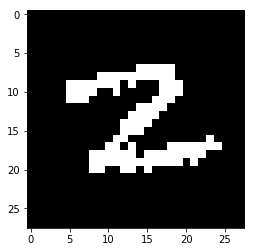

In [10]:
# Sample image of the learned class. 
plt.figure(1)
image = mnist_image_matrix[:,10]
show_digit(image.numpy())

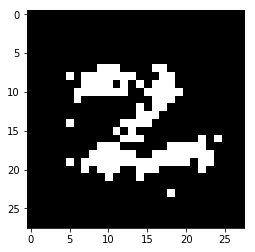

In [11]:
# Reconstruction of the sample image. 
plt.figure(2)
_, image_reconst = rbm.reconstruct(image)
show_digit(image_reconst.numpy())

In [12]:
# Get the weight matrix to visualize the feature detectors. 
W = rbm.W

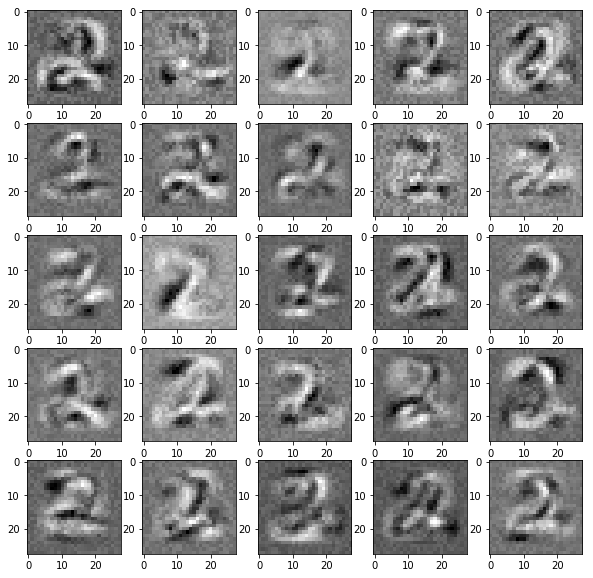

In [13]:
# Visualize the first 25 feature detectors, i.e, the incoming weights to the first 25 hidden units. 
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(W[i, :].numpy().reshape((28,28)), cmap=plt.cm.gray)

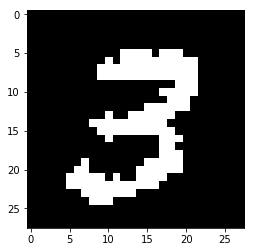

In [14]:
# Display the test image of the different class (digit 3, in this case). 
show_digit(mnist_test_image.numpy())

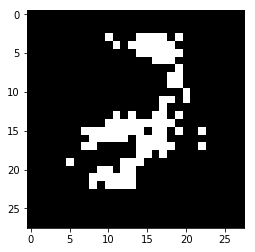

In [15]:
# Perform reconstruction with rbm and display the reconstructed image
# After 100 gibbs sampling steps, the rbm recalls a 2 since it was trained to memorize images of the digit 2. 
image = mnist_test_image
_, image_reconst = rbm.reconstruct(image, n_gibbs=100)
show_digit(image_reconst.numpy())